In [2]:
#IMPORTANDO BIBLIOTECAS IMPORTANTES
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import griddata 
from Modules.Sama_Irai import calang,caldist
from scipy import std
from scipy.stats.stats import pearsonr

In [3]:
# Criacao dos dataframes aqui:
iso1 = pd.read_csv('Mod0',delim_whitespace=True,skiprows=2)

iso2 = pd.read_csv('Mod1',delim_whitespace=True,skiprows=2)

iso3 = pd.read_csv('Mod2',delim_whitespace=True,skiprows=2)

data = pd.read_csv('IGRF/Campo_Total',delim_whitespace= True,usecols=[0,13])

SP1 = pd.read_excel('SP.xls')

SPN = pd.read_excel('SPN.xls')

irai = pd.read_excel('Irai(RS).xls',sheet_name=2,skiprows=4,usecols=[0,19])
irai['Lat'] = -27.18
irai['Long'] = -53.23
header = ['Ano', 'Long','Lat','F']
sama = pd.read_excel('Sama.xls')
grad1 = sp.gradient(iso1['F'])
grad2 = sp.gradient(iso2['F'])
grad3 = sp.gradient(iso3['F'])
data

,DATE,F
0,1960.5,24259
1,1961.5,24225
2,1962.5,24192
3,1963.5,24159
4,1964.5,24126
5,1965.5,24087
6,1966.5,24041
7,1967.5,23995
8,1968.5,23949
9,1969.5,23904


In [3]:
faixa = 11
c = 1
ini = 0
media = []
dat = []
for i in range(len(SP1['Precipitacao'])):
    if c >= faixa:
        media.append(np.mean(SP1['Precipitacao'][ini:faixa]))
        ini = c+1
        faixa = c+12
    c += 1

In [4]:
for j in range(56):
    dat.append(j + 1961)
array  = {'Ano':dat}
SP = pd.DataFrame(array)
SP['Media'] = media

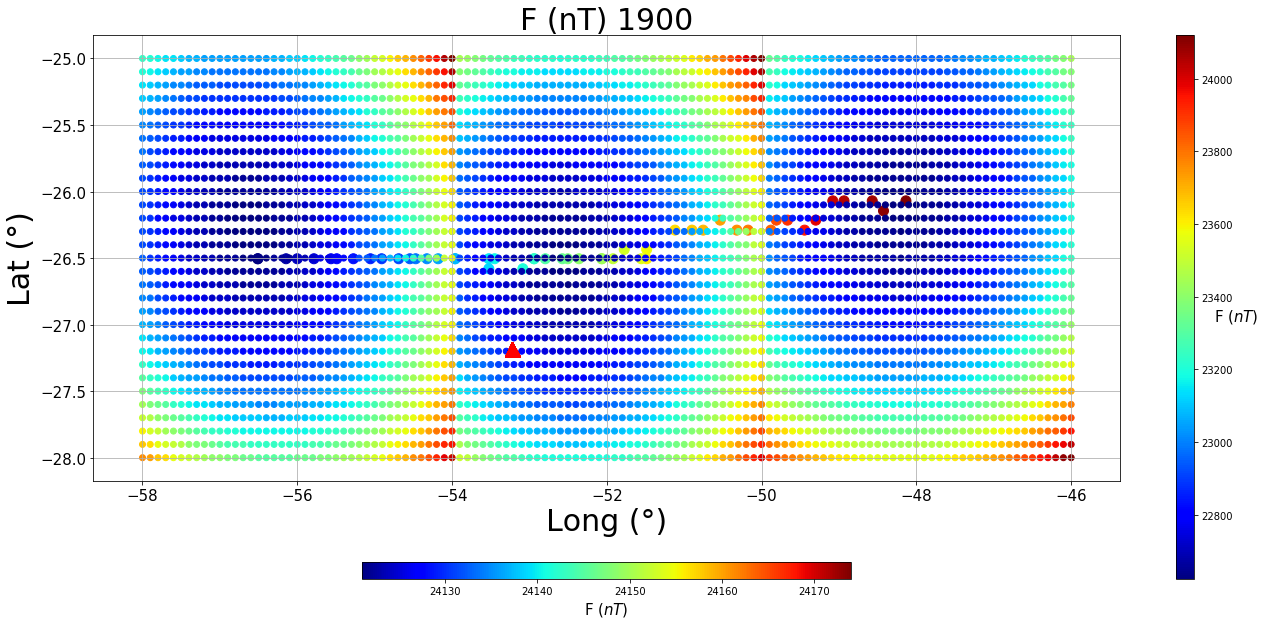

In [5]:
# Plot aqui: 
plt.figure(figsize=(20,10),facecolor = 'w')

p1 = plt.plot(irai['Long'], irai['Lat'], '^r', markersize = 15, label = 'Irai') #IRAI
p2 = plt.scatter(sama['Long'],sama['Lat'], c=sama['F'],cmap='jet',s = 100) #CENTRO SAMA
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
p3 = plt.scatter(iso1['Long'],iso1['Lat'],c = iso1['F'],cmap='jet') #ISO1
cbar = plt.colorbar(p3, aspect=30, fraction = 0.03, orientation='horizontal')
cbar.set_label('F $ (nT) $',fontsize=15,rotation = 0)
p4 = plt.scatter(iso2['Long'],iso2['Lat'],c = iso2['F'],cmap='jet') #ISO2
p5 = plt.scatter(iso3['Long'],iso3['Lat'],c = iso3['F'],cmap='jet') #ISO3
plt.xlabel('Long (°)', fontsize=30)
plt.ylabel('Lat (°)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('F (nT) 1900',fontsize=30)
plt.grid()

plt.savefig('GRID DE PONTOS 1961;1985; 2010.pdf', dpi=300, transparet=True, bbox_inches='tight')
plt.show()

In [6]:
# Definicão da amostragem de pontos (longX, latY) a serem criados:
x1min = iso1.min()['Long']
x1max = iso1.max()['Long']
x1 = np.linspace(x1min, x1max, 50)

y1min = iso1.min()['Lat']
y1max = iso1.max()['Lat']
y1 = np.linspace(y1min, y1max, 50)

#Criação do Meshgrid:
X1,Y1 = np.meshgrid(x1,y1)


x2min = iso2.min()['Long']
x2max = iso2.max()['Long']
x2 = np.linspace(x2min, x2max, 50)

y2min = iso2.min()['Lat']
y2max = iso2.max()['Lat']
y2 = np.linspace(y2min, y2max, 50)

#Criação do Meshgrid:
X2,Y2 = np.meshgrid(x2,y2)


x3min = iso3.min()['Long']
x3max = iso3.max()['Long']
x3 = np.linspace(x3min, x3max, 50)

y3min = iso3.min()['Lat']
y3max = iso3.max()['Lat']
y3 = np.linspace(y3min, y3max, 50)

#Criação do Meshgrid:
X3,Y3 = np.meshgrid(x3,y3)

In [7]:
# Criacao de arrays para facilitar a funcao de interpolacao (SENAO DÁ CHABUUUU!!!! - limitação do pandas!):
long1 = np.array(iso1['Long'])
lat1 = np.array(iso1['Lat'])
F1 = np.array(iso1['F'])

long2 = np.array(iso2['Long'])
lat2 = np.array(iso2['Lat'])
F2 = np.array(iso2['F'])

long3 = np.array(iso3['Long'])
lat3 = np.array(iso3['Lat'])
F3 = np.array(iso3['F'])

In [8]:
# interpolacao aqui:
Fi1_cubic   = griddata( (long1, lat1), F1, (X1,Y1), method = 'cubic')
Fi2_cubic   = griddata( (long2, lat2), F2, (X2,Y2), method = 'cubic')
Fi3_cubic   = griddata( (long3, lat3), F3, (X3,Y3), method = 'cubic')

In [9]:
#Creating our model - elipse for now
theta = np.linspace(0,2*np.pi,50)
a1 = 2.17
b1 = 1.4
mindist1 = np.zeros(50)
distances1 = np.zeros(50)

a2 = 1.5
b2 = 1.15
mindist2 = np.zeros(50)
distances2 = np.zeros(50)

a3 = 1.5
b3 = 1.1
mindist3 = np.zeros(50)
distances3 = np.zeros(50)

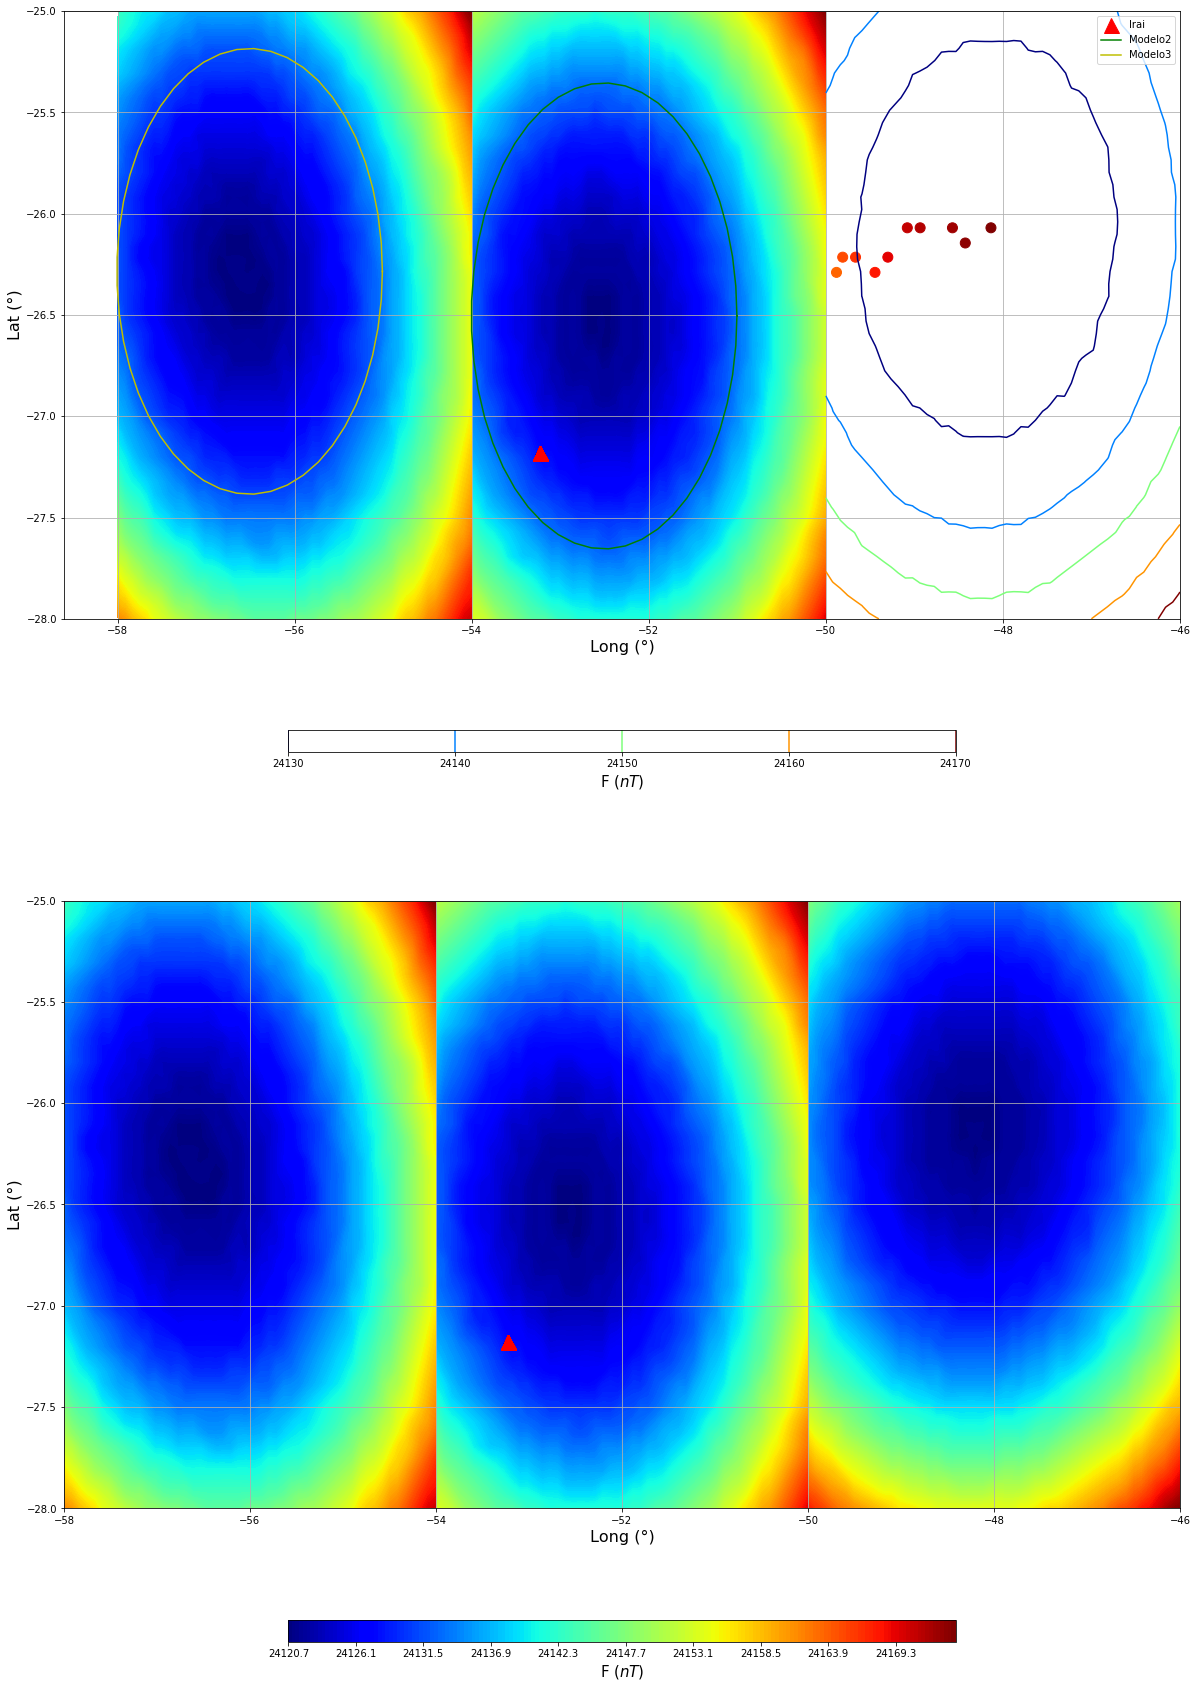

In [10]:
#Plotando as Isofotas
plt.figure(figsize=(20,30), facecolor='w')

plt.subplot(211)
p0 = plt.plot(irai['Long'], irai['Lat'], '^r', markersize = 15, label = 'Irai') #IRAI
#p1 = plt.plot(a1*np.cos(theta) + sama['Long'][0],b1*np.sin(theta) + sama['Lat'][0],'r',label = 'Modelo1') #MODELO ISO1
#plt.legend()
p2 = plt.plot(a2*np.cos(theta) + sama['Long'][24],b2*np.sin(theta) + sama['Lat'][24],'g',label = 'Modelo2') #MODELO ISO1
plt.legend()
p3 = plt.plot(a3*np.cos(theta) + sama['Long'][49],b3*np.sin(theta) + sama['Lat'][49]+0.22,'y',label = 'Modelo3') #MODELO ISO1
plt.legend()
p4 = plt.scatter(sama['Long'],sama['Lat'], c=sama['F'],cmap='jet',s = 100) #CENTRO SAMA
p5 = plt.contour(X1, Y1, Fi1_cubic, 5,cmap = 'jet') #ISOLINHAS ISO1
p6 = plt.contourf(X2, Y2, Fi2_cubic, 200,cmap = 'jet') #ISOLINHAS ISO2
p7 = plt.contourf(X3, Y3, Fi3_cubic, 200,cmap = 'jet') #ISOLINHAS ISO2
cbar = plt.colorbar(p5, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Long (°)', fontsize=16)
plt.ylabel('Lat (°)', fontsize=16)
plt.grid()

plt.subplot(212)
p1 = plt.plot(irai['Long'], irai['Lat'], '^r', markersize = 15, label = 'Irai')
p2 = plt.contourf(X1, Y1, Fi1_cubic, 200,cmap='jet') 
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
p6 = plt.contourf(X2, Y2, Fi2_cubic, 200,cmap = 'jet') #ISOLINHAS ISO2
p7 = plt.contourf(X3, Y3, Fi3_cubic, 200,cmap = 'jet') #ISOLINHAS ISO2
plt.xlabel('Long (°)', fontsize=16)
plt.ylabel('Lat (°)', fontsize=16)
plt.grid()

plt.savefig('Isofotas 1961;1985;2010.pdf', dpi=300, transparet=True, bbox_inches='tight')
plt.show()

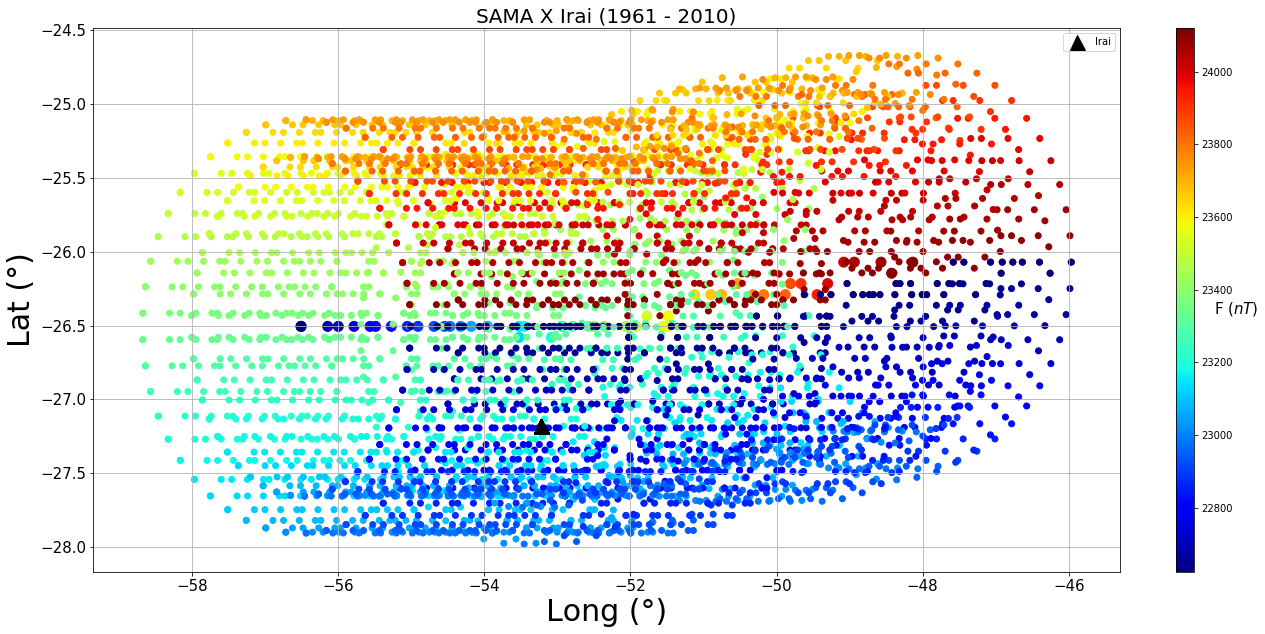

In [11]:
#Plot do centro da SAMA vs Irai no periodo de 1961 a 2010
#Gráficos aqui:
plt.figure(figsize=(20,10),facecolor = 'w')

plt.title('SAMA X Irai (1961 - 2010)', fontsize=20)
p1 = plt.plot(irai['Long'], irai['Lat'], '^k', markersize = 15, label = 'Irai')
plt.legend()
p2 = plt.scatter(sama['Long'],sama['Lat'], c=sama['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
for i in range(len(sama['Long'])):
    plt.scatter(a1*np.cos(theta) + sama['Long'][i], b1*np.sin(theta) + sama['Lat'][i], c=sama['F'],cmap='jet')
    for j in range(50):
        mindist1[j] = caldist(irai['Lat'][j],irai['Long'][j],(a1*np.sin(theta) + sama['Lat'][i])[j], (b1*np.cos(theta) + sama['Long'][i])[j] )
    distances1[i] = min(mindist1)
    mindist1 =  np.zeros(50)
for i in range(len(sama['Long'])):
    plt.scatter(a2*np.cos(theta) + sama['Long'][i], b2*np.sin(theta) + sama['Lat'][i], c=sama['F'],cmap='jet')
    for j in range(50):
        mindist2[j] = caldist(irai['Lat'][j],irai['Long'][j],(a2*np.sin(theta) + sama['Lat'][i])[j], (b2*np.cos(theta) + sama['Long'][i])[j] )
    distances2[i] = min(mindist2)
    mindist2 =  np.zeros(50)
for j in range(50):
    distances3[j] = caldist(irai['Lat'][j],irai['Long'][j],(b3*np.sin(theta) + sama['Lat'][49]+0.22)[j], (a3*np.cos(theta) + sama['Long'][49])[j] )
distance3 = min(distances3)
plt.xlabel('Long (°)', fontsize=30)
plt.ylabel('Lat (°)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('Elipses vs Irai.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()


In [12]:
distances = np.zeros(50)
for i in range(50):
    if i < 24:
        distances[i] = distances1[i]
    elif i>=24 and i<49:
        distances[i] = distances2[i]
    elif i == 49:
        distances[i] = distance3
sama['Distances'] = distances
index = []
for i in range(len(irai)):
    if irai['Media'][i] != 0:
        index.append(i)

In [13]:
irai1 = irai.iloc[index]
irai = irai1.reset_index()

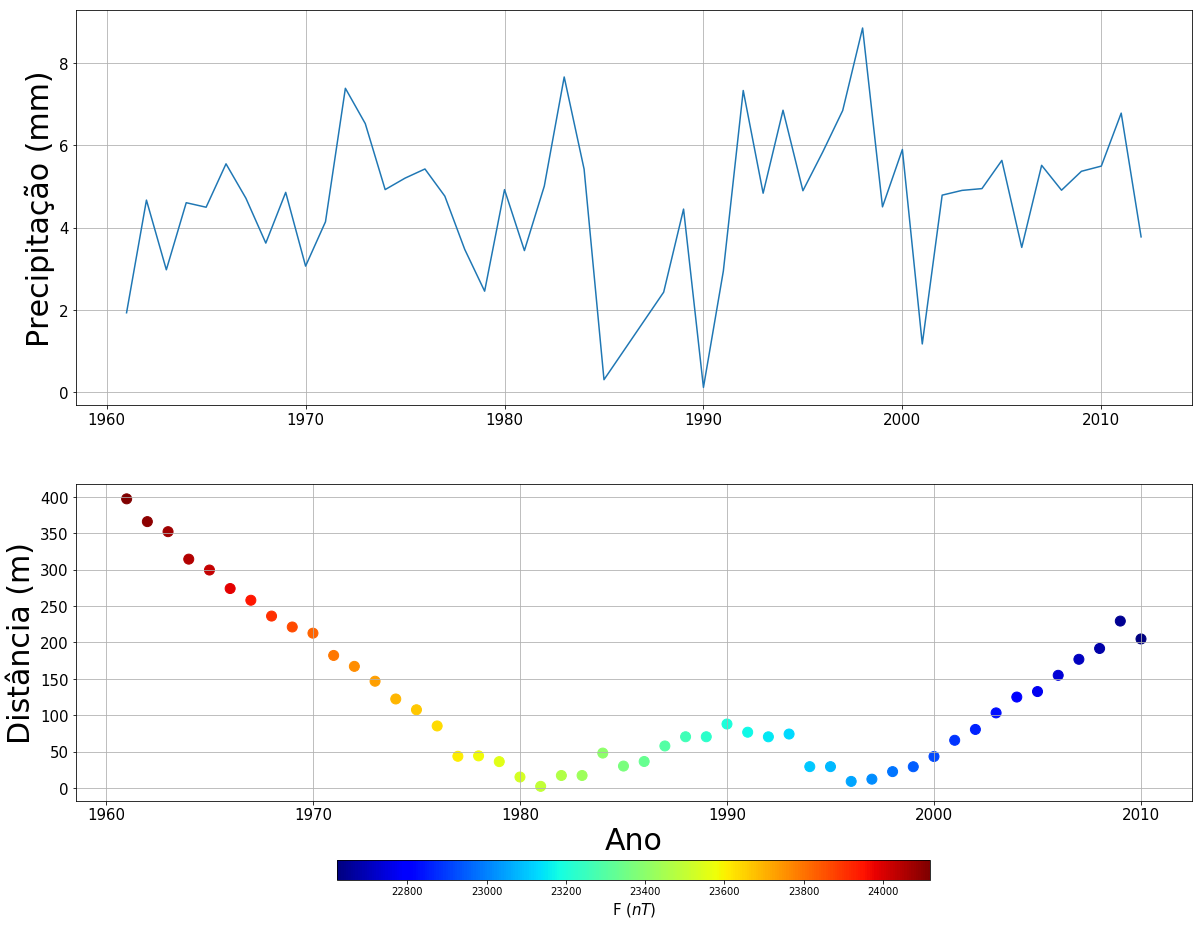

In [14]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'])
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(sama['Ano'],sama['Distances'], c=sama['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Distância (m)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('Precipitação vs Distância da SAMA.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()

In [15]:
dobs = np.array(sama['Distances'])
G1 = np.array(sama['Ano'])
G2 = np.zeros(len(sama['Ano']))
for i in range(len(G2)):
    G2[i] = 1.0
G = np.c_[G1,G2]
param1 = np.linalg.inv(np.dot(G.T,G))
param2 = np.dot(G.T,dobs)
param = np.dot(param1,param2)
y = np.dot(G,param)
temp1 = np.array(abs(y - sama['Distances']))
sama['Distancesn'] = temp1

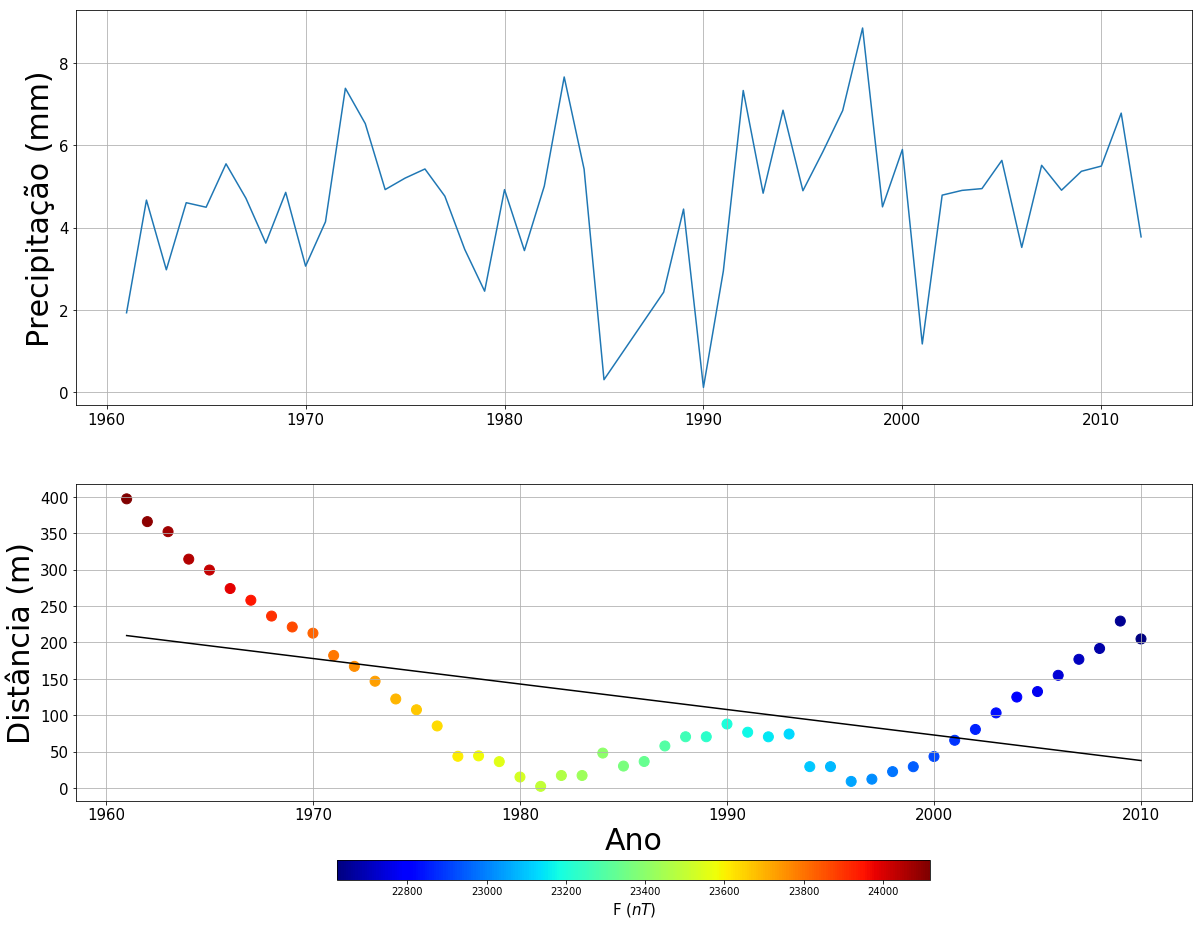

In [16]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'])
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(sama['Ano'],sama['Distances'], c=sama['F'],cmap='jet',s = 100)
plt.plot(sama['Ano'],y,'k')
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Distância (m)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

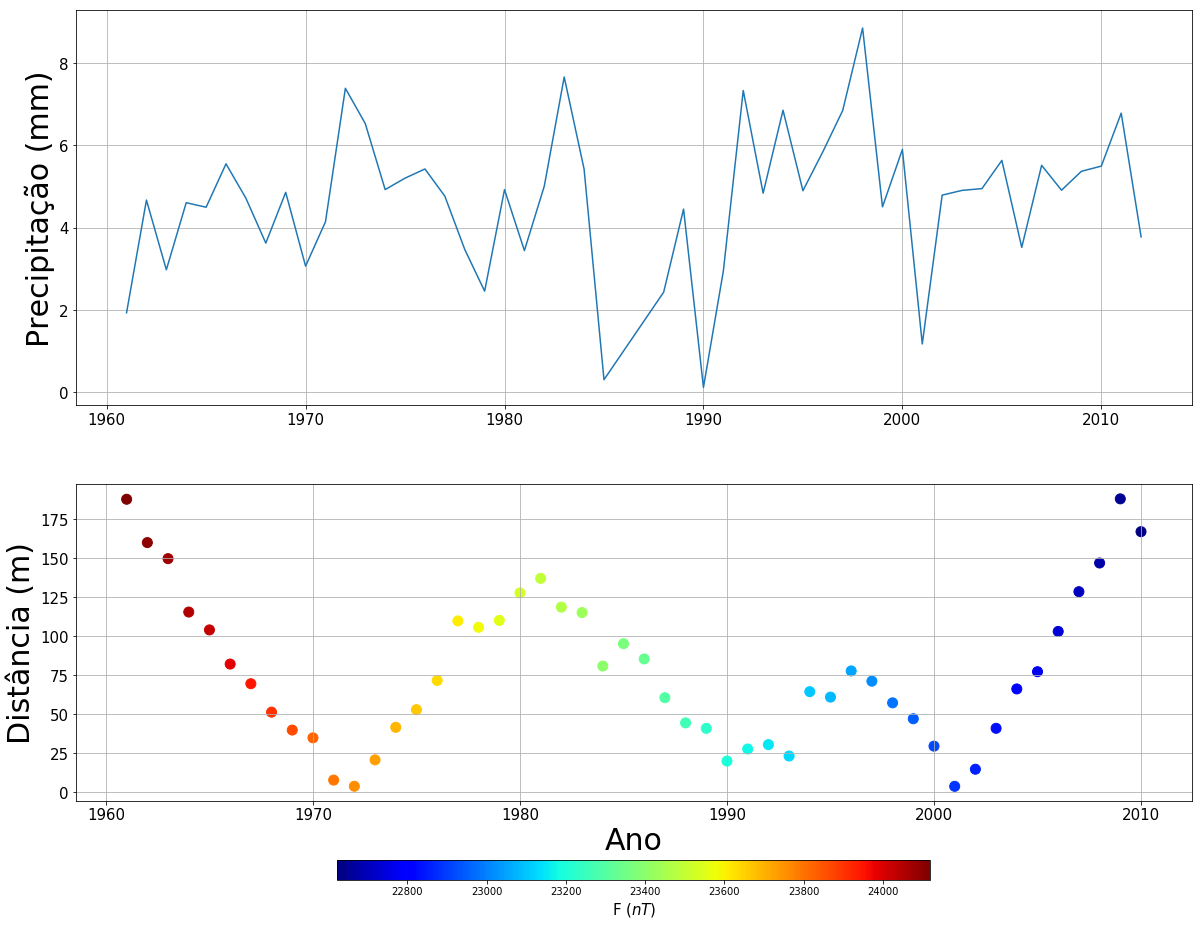

In [17]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'])
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(sama['Ano'],sama['Distancesn'], c=sama['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Distância (m)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

In [18]:
'''
dobs = np.array(sama['Distancesn'])
G1 = np.array(sama['Ano'])
G2 = np.zeros(len(sama['Ano']))
for i in range(len(G2)):
    G2[i] = 1.0
G = np.c_[G1,G2]
param1 = np.linalg.inv(np.dot(G.T,G))
param2 = np.dot(G.T,dobs)
param = np.dot(param1,param2)
y = np.dot(G,param)
temp1 = np.array(abs(y - sama['Distancesn']))
sama['Distancesnn'] = temp1
'''

"\ndobs = np.array(sama['Distancesn'])\nG1 = np.array(sama['Ano'])\nG2 = np.zeros(len(sama['Ano']))\nfor i in range(len(G2)):\n    G2[i] = 1.0\nG = np.c_[G1,G2]\nparam1 = np.linalg.inv(np.dot(G.T,G))\nparam2 = np.dot(G.T,dobs)\nparam = np.dot(param1,param2)\ny = np.dot(G,param)\ntemp1 = np.array(abs(y - sama['Distancesn']))\nsama['Distancesnn'] = temp1\n"

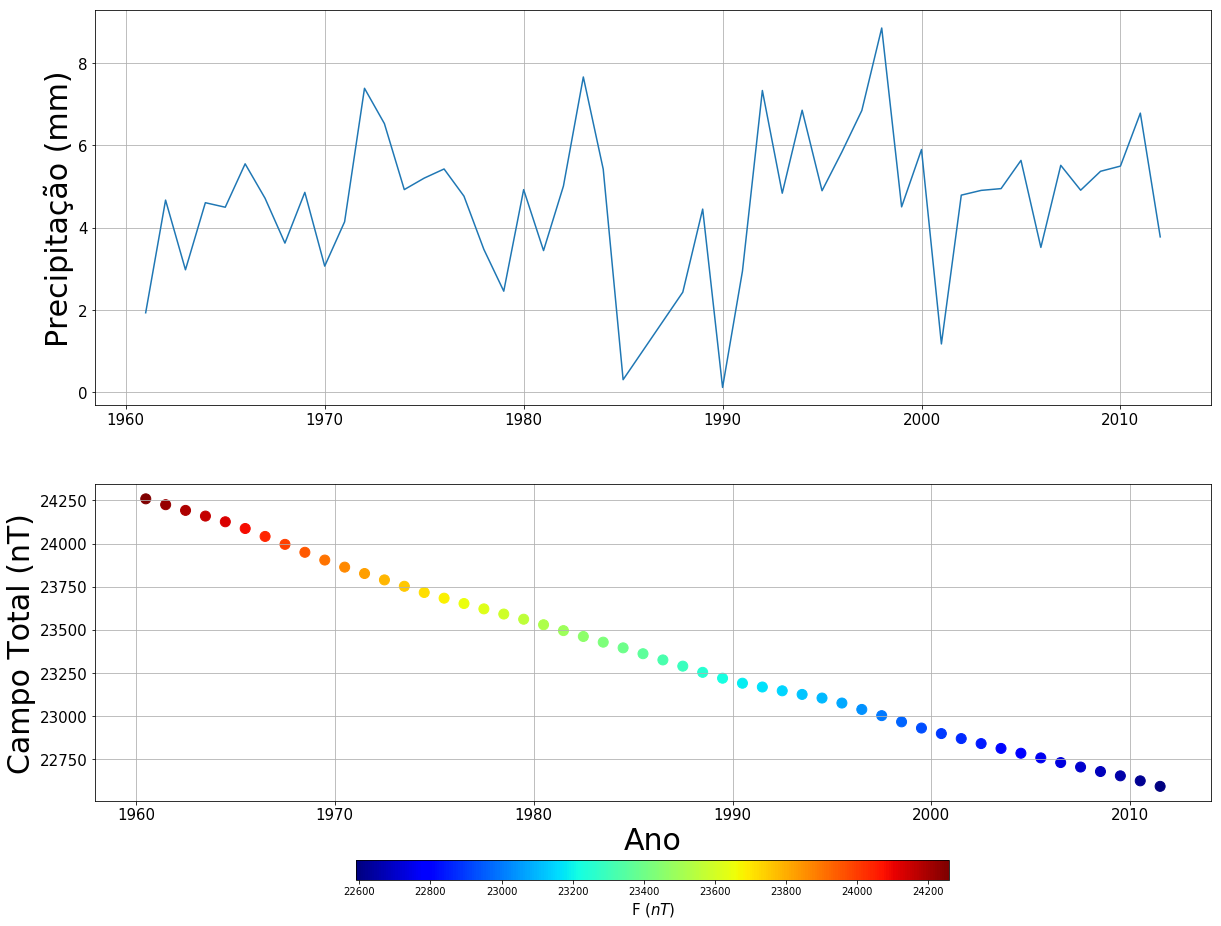

In [19]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'])
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(data['DATE'],data['F'], c=data['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('Precipitação vs Campo Total.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()

In [20]:
dobs = np.array(data['F'])
G1 = np.array(data['DATE'])
G2 = np.zeros(len(data['DATE']))
for i in range(len(G2)):
    G2[i] = 1.0
G = np.c_[G1,G2]
param1 = np.linalg.inv(np.dot(G.T,G))
param2 = np.dot(G.T,dobs)
param = np.dot(param1,param2)
y = np.dot(G,param)
temp = np.array(data['F']-y)
data['Fn'] = temp

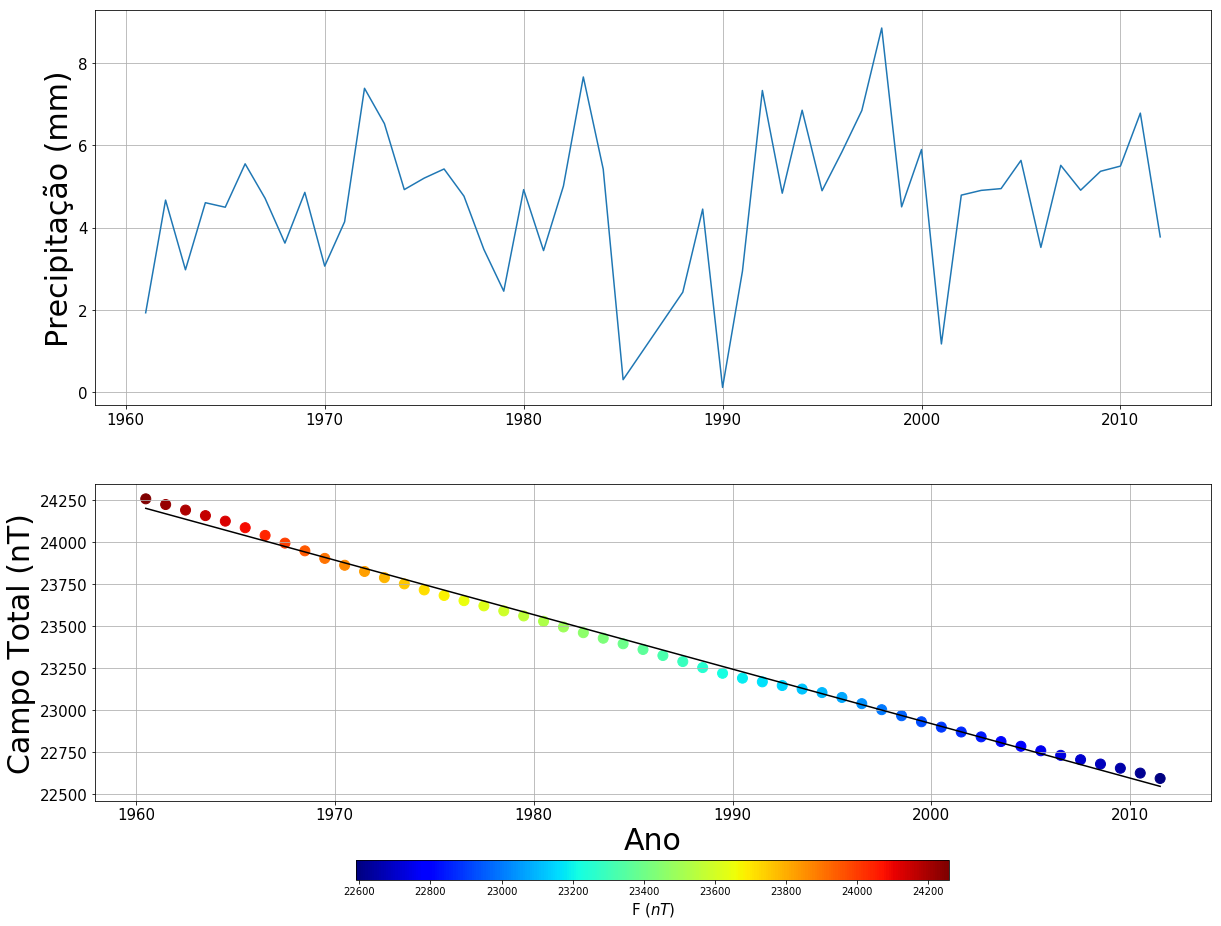

In [21]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'])
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(data['DATE'],data['F'], c=data['F'],cmap='jet',s = 100)
plt.plot(data['DATE'],y,'k')
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

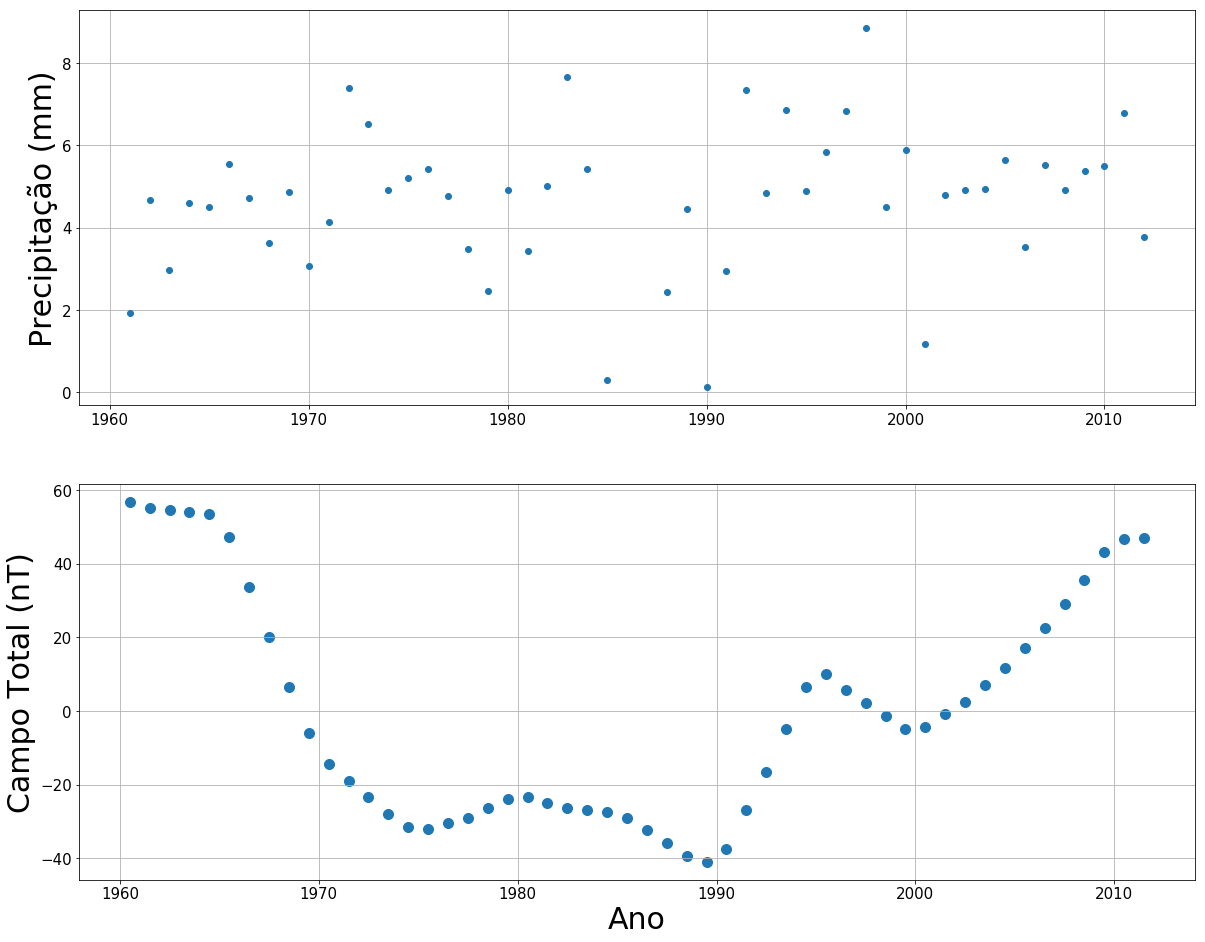

In [22]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'],'o')
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(data['DATE'],data['Fn'],s = 100)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('Precipitação_VS_Campo_Total_SAMA.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()

In [23]:
faixa = 9
ano = [1965,1975,1985,1995,2005]
c = 0
ini = 0
media = []
dvp = []
maxi = []
for i in range(len(data['DATE'])):
    if c >= faixa:
        media.append(np.mean(irai['Media'][ini:c]))
        dvp.append(std(irai['Media'][ini:c]))
        maxi.append(max(irai['Media'][ini:c]))
        ini = c+1
        faixa = c+9
    c += 1

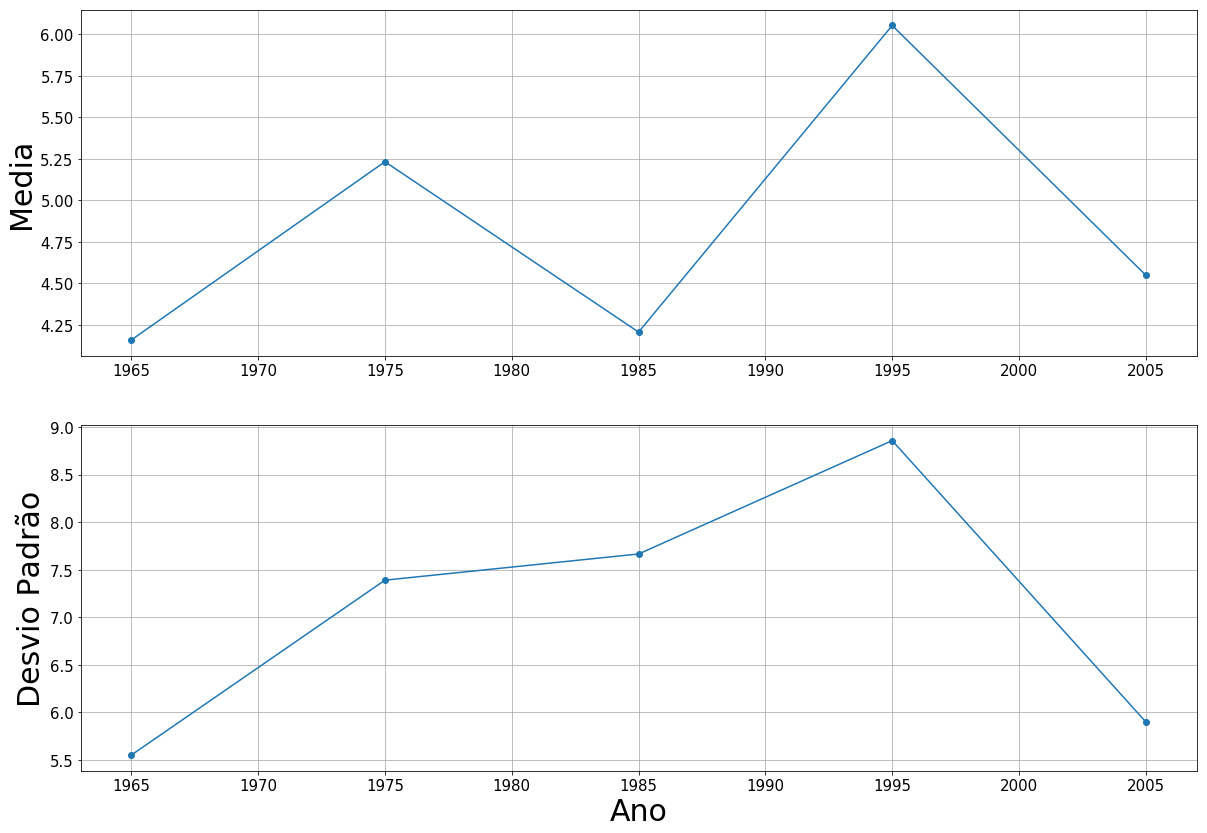

In [24]:
plt.figure(figsize=(20,14),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(ano,media,'o-')
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Media', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.plot(ano,maxi,'o-')
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Desvio Padrão', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

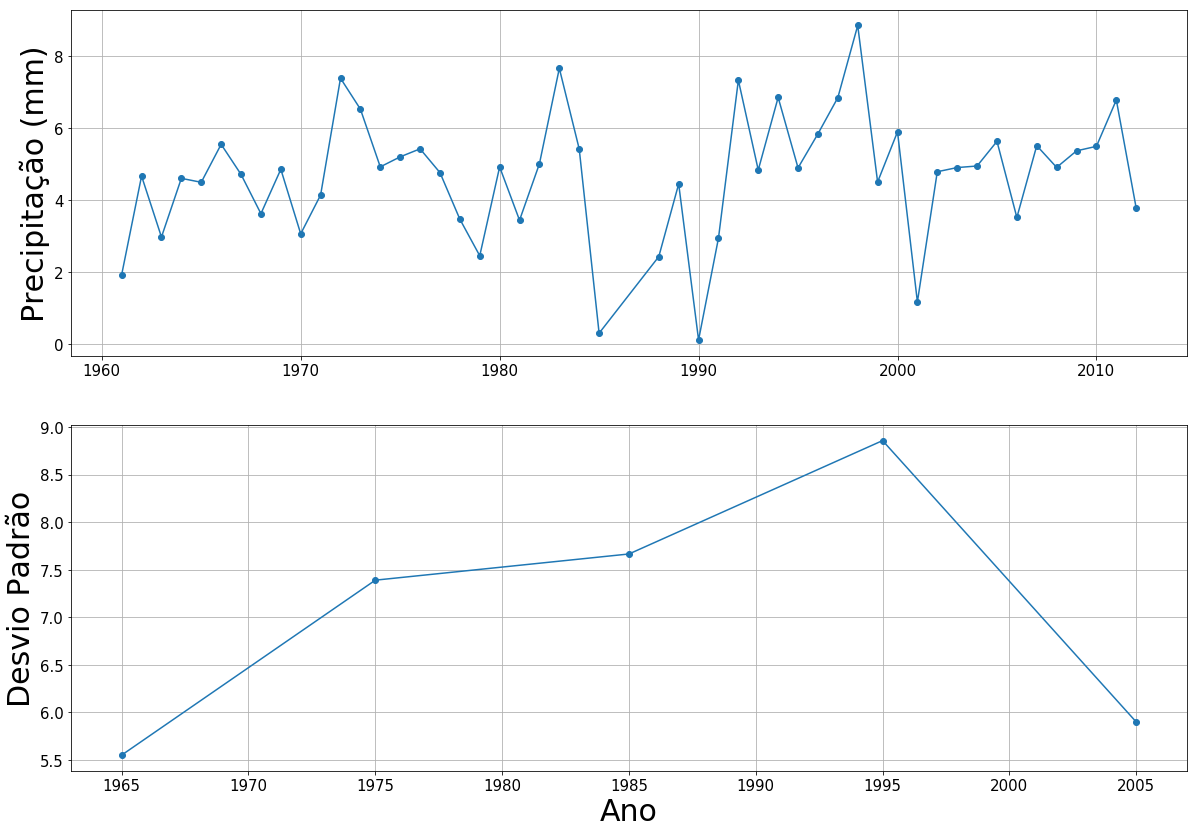

In [25]:
plt.figure(figsize=(20,14),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'],'o-')
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.plot(ano,maxi,'o-')
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Desvio Padrão', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

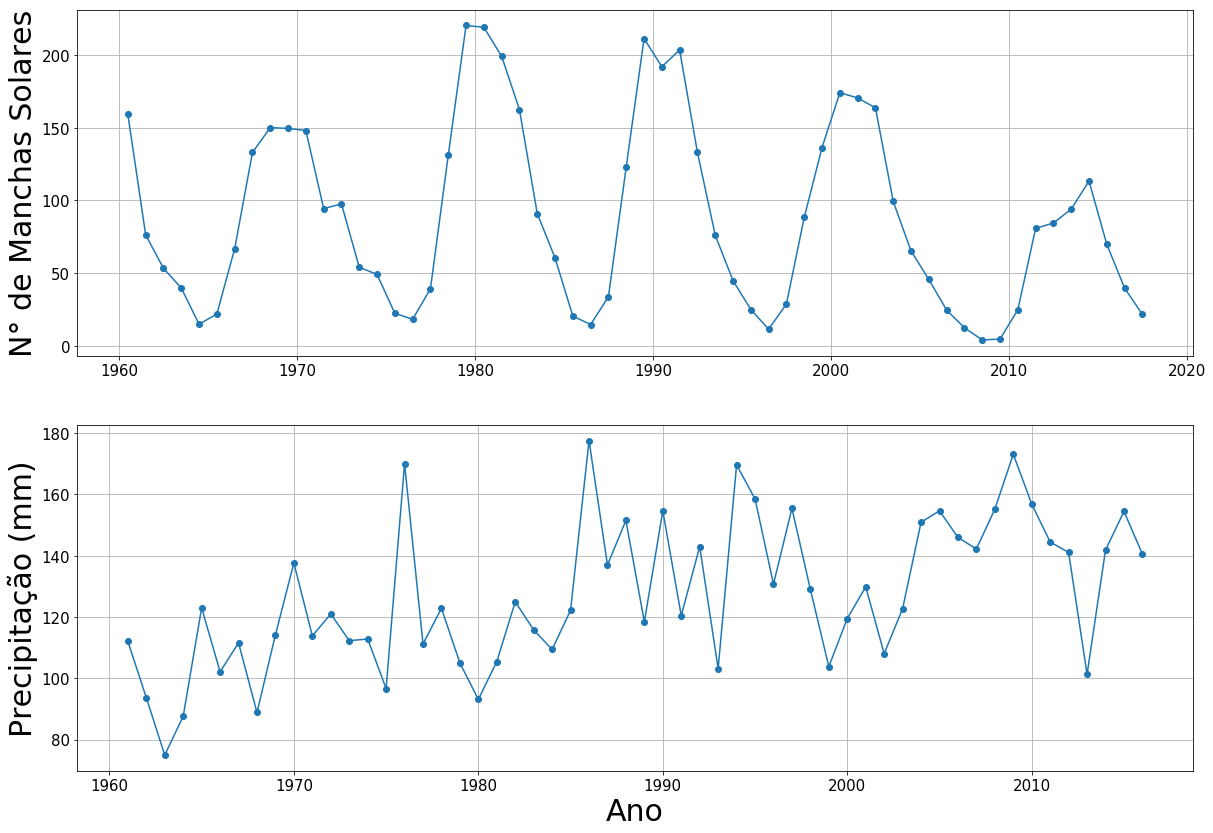

In [26]:
plt.figure(figsize=(20,14),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(SPN['Ano'],SPN['Media'],'o-')
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('N° de Manchas Solares', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.plot(SP['Ano'],SP['Media'],'o-')
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()


plt.show()

In [27]:
dobs = np.array(SP['Media'])
G1 = np.array(SP['Ano'])
G2 = np.zeros(len(SP['Ano']))
for i in range(len(G2)):
    G2[i] = 1.0
G = np.c_[G1,G2]
param1 = np.linalg.inv(np.dot(G.T,G))
param2 = np.dot(G.T,dobs)
param = np.dot(param1,param2)
y = np.dot(G,param)
temp = np.array(abs(y- SP['Media']))
SP['Median'] = temp

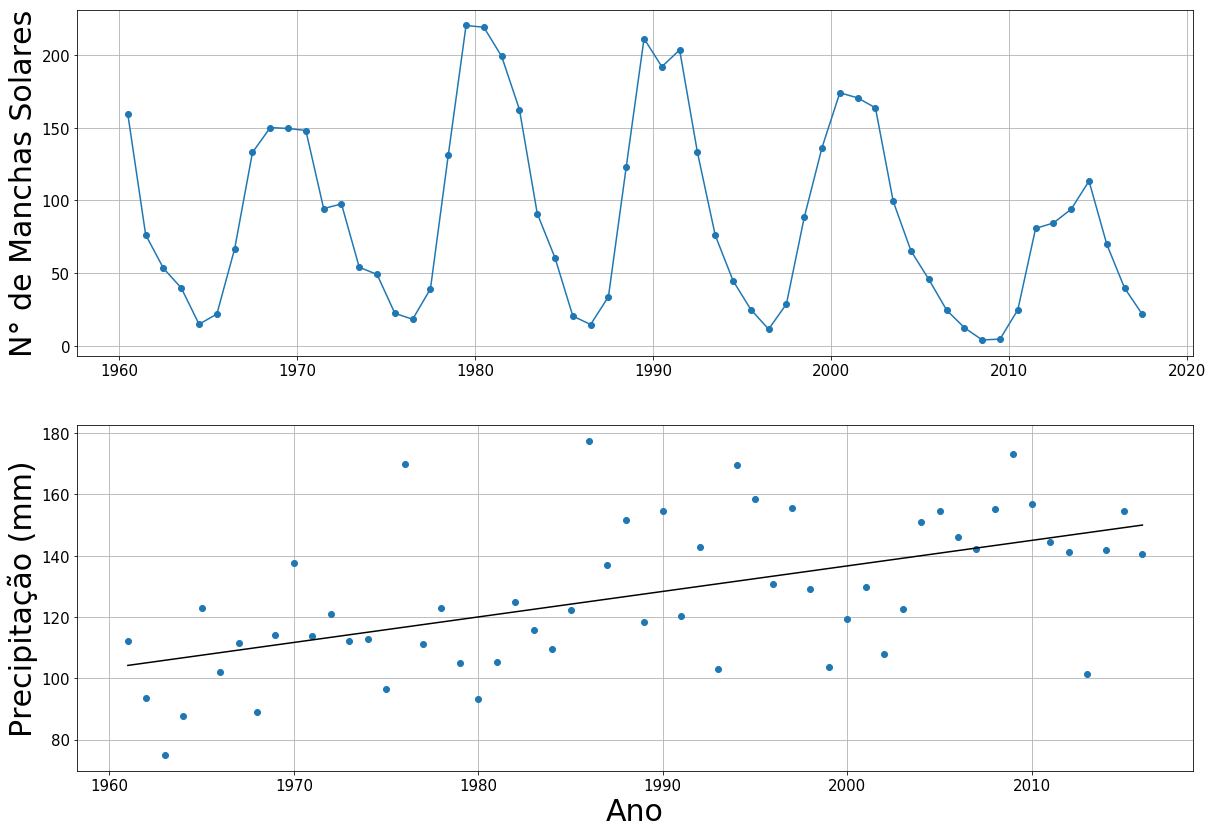

In [28]:
plt.figure(figsize=(20,14),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(SPN['Ano'],SPN['Media'],'o-')
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('N° de Manchas Solares', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.plot(SP['Ano'],SP['Media'],'o')
plt.plot(SP['Ano'],y,'k')
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()


plt.show()

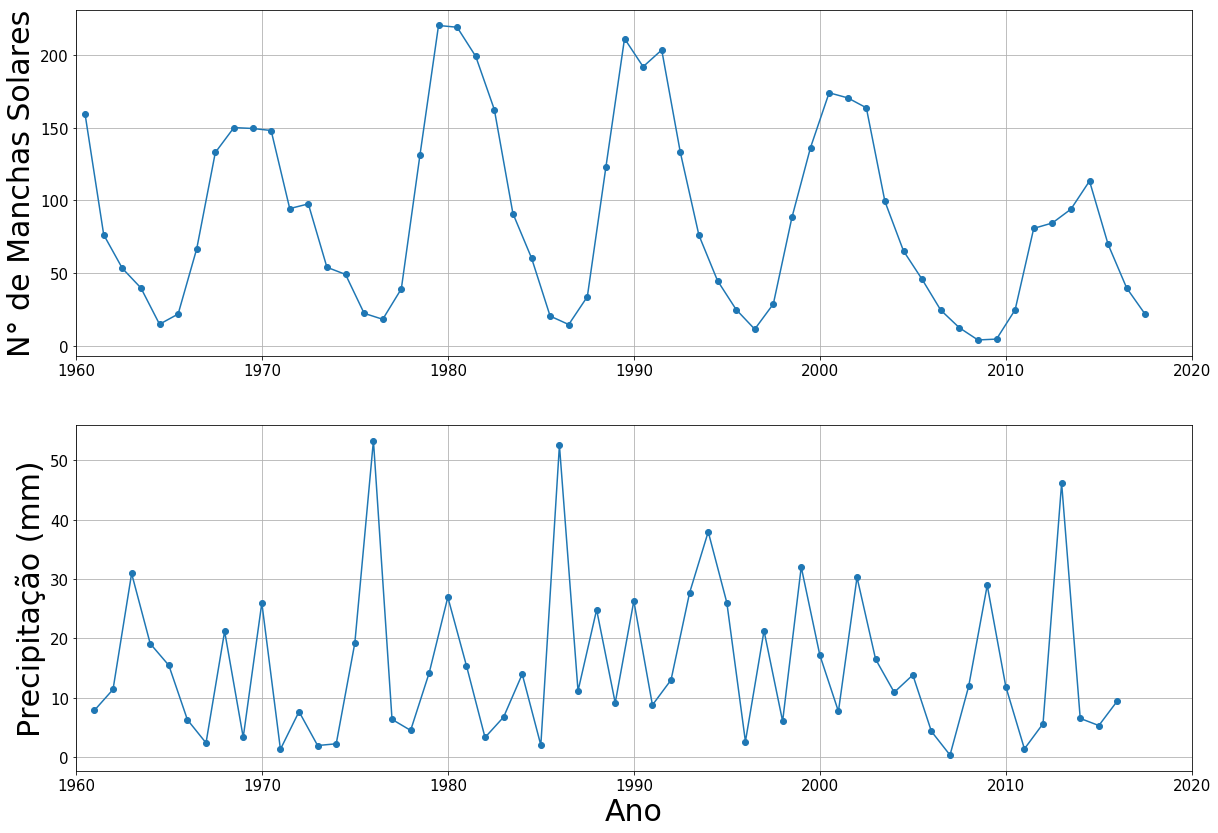

In [29]:
plt.figure(figsize=(20,14),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(SPN['Ano'],SPN['Media'],'o-')
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('N° de Manchas Solares', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1960,2020)
plt.grid()

plt.subplot(212)
p2 = plt.plot(SP['Ano'],SP['Median'],'o-')
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1960,2020)

plt.grid()
plt.savefig('N°_de_manchas_VS_Precipitacao_IRAI.pdf', dpi=300, transparet=True, bbox_inches='tight')


plt.show()

In [59]:
test = []
for i in range(1,len(SPN)-1):
    test.append(SPN.Media[i]) 
test = np.array(test)
coef = np.correlate(SPN.Media, SP.Median, mode='same')

In [68]:
def xcorr(x, y, normed=True, detrend=False, maxlags=10):
    # Cross correlation of two signals of equal length
    # Returns the coefficients when normed=True
    # Returns inner products when normed=False
    # Usage: lags, c = xcorr(x,y,maxlags=len(x)-1)
    # Optional detrending e.g. mlab.detrend_mean

    Nx = len(x)
    if Nx != len(y):
        raise ValueError('x and y must be equal length')
    
    if detrend:
        import matplotlib.mlab as mlab
        x = mlab.detrend_mean(np.asarray(x)) # can set your preferences here
        y = mlab.detrend_mean(np.asarray(y))
    
    c = np.correlate(x, y, mode='full')

    if normed:
        n = np.sqrt(np.dot(x, x) * np.dot(y, y)) # this is the transformation function
        c = np.true_divide(c,n)

    if maxlags is None:
        maxlags = Nx - 1

    if maxlags >= Nx or maxlags < 1:
        raise ValueError('maglags must be None or strictly '
                         'positive < %d' % Nx)

    lags = np.arange(-maxlags, maxlags + 1)
    c = c[Nx - 1 - maxlags:Nx + maxlags]
    return c

In [69]:
xcorr(test, SP.Median, normed=True)

array([ 0.5809706 ,  0.60322961,  0.61637087,  0.61044409,  0.59681035,
        0.5738775 ,  0.57831957,  0.57101463,  0.61884857,  0.61182652,
        0.60585354,  0.60796328,  0.64993269,  0.693025  ,  0.67401966,
        0.66341304,  0.59882756,  0.53434988,  0.51056418,  0.50261169,
        0.4826105 ])

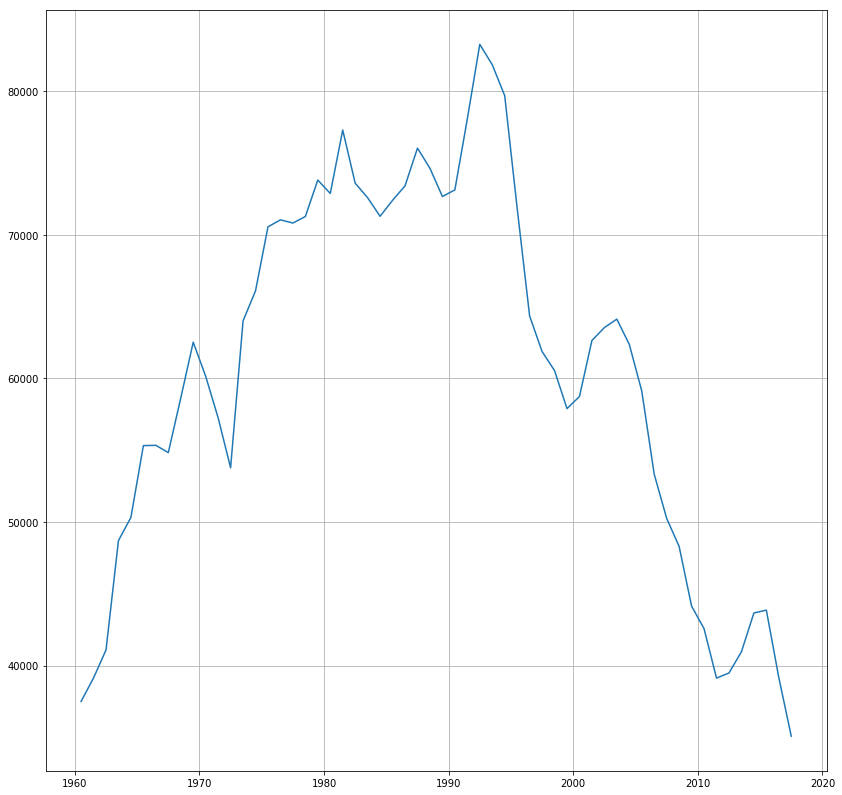

In [61]:
plt.figure(figsize=(14,14), facecolor='w')

plt.plot(SPN.Ano, coef)
plt.grid()

plt.show()

In [30]:
faixa = 9
ano = [1965,1975,1985,1995,2005]
c = 0
ini = 0
media_sn = []
dvp_sn = []
maxi_sn = []
for i in range(len(data['DATE'])):
    if c >= faixa:
        media_sn.append(np.mean(SPN['Media'][ini:c]))
        dvp_sn.append(std(SPN['Media'][ini:c]))
        maxi_sn.append(max(SPN['Media'][ini:c]))
        ini = c+1
        faixa = c+9
    c += 1

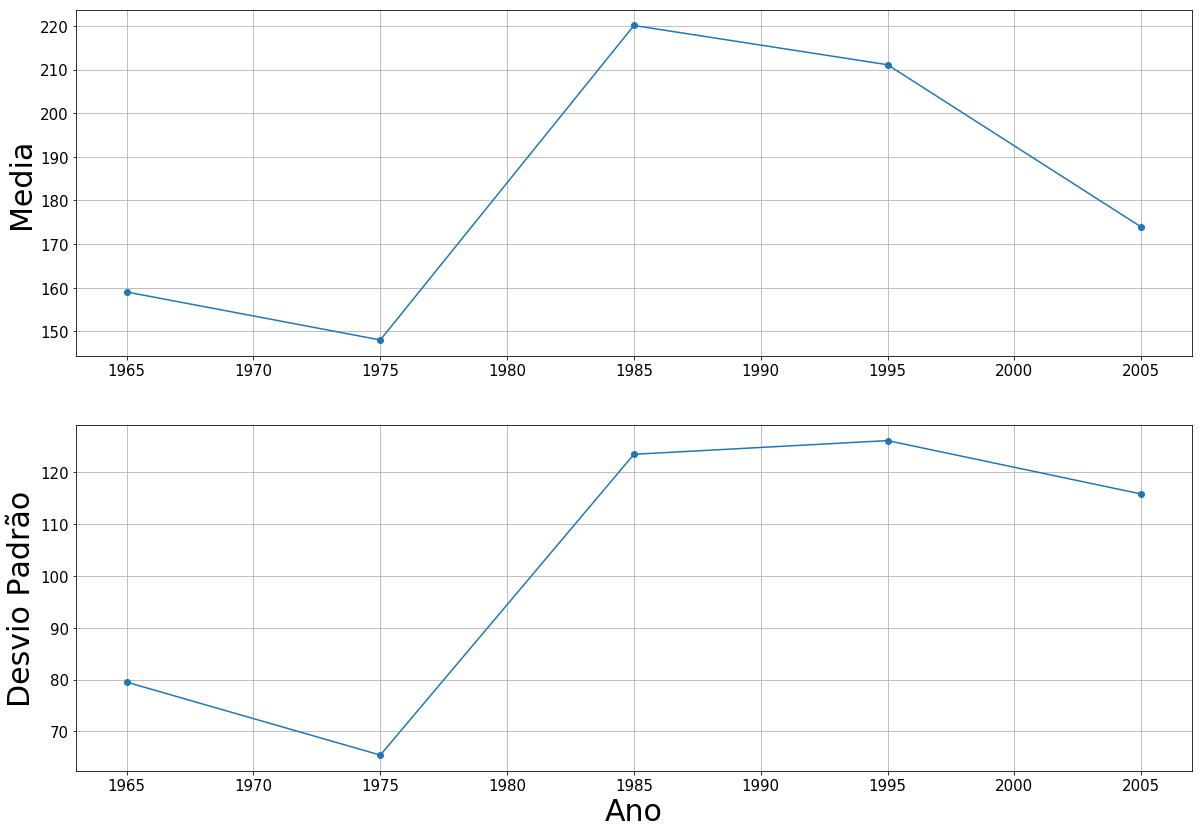

In [31]:
plt.figure(figsize=(20,14),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(ano,maxi_sn,'o-')
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Media', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.plot(ano,media_sn,'o-')
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Desvio Padrão', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

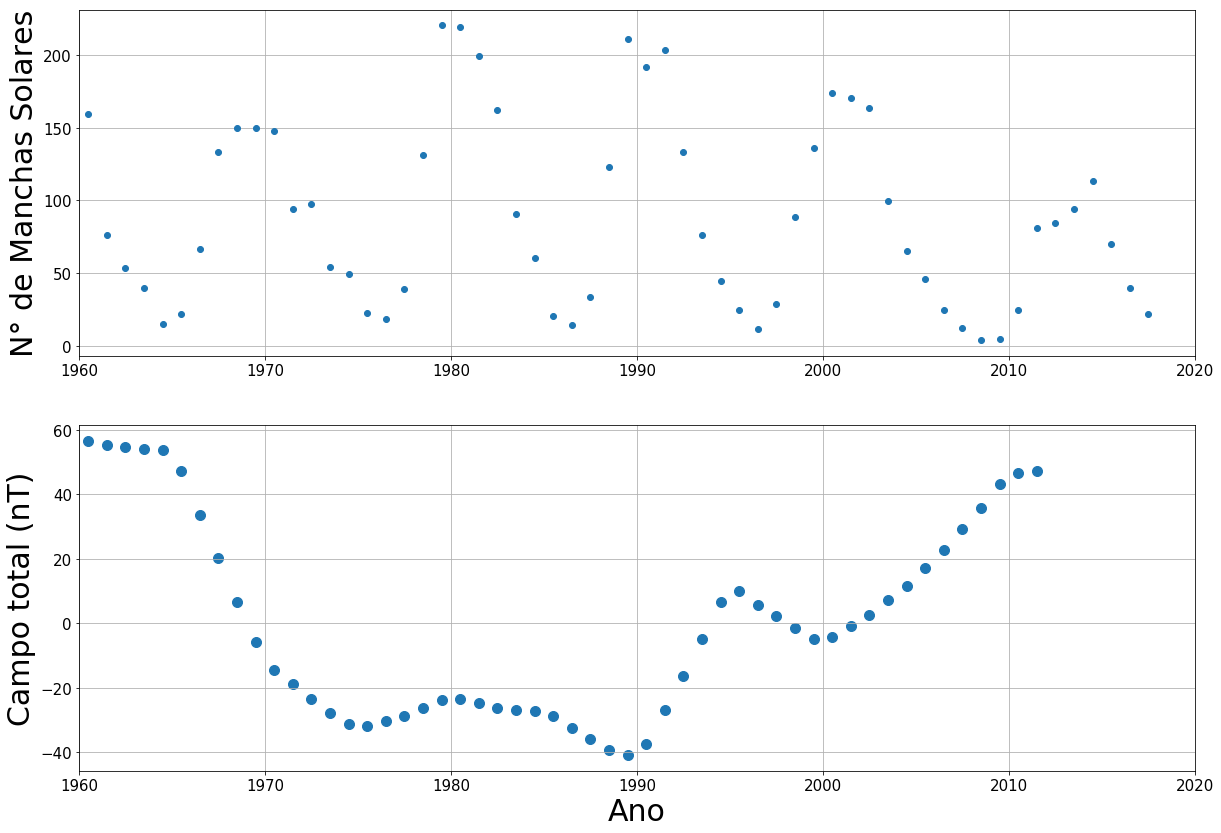

In [32]:
plt.figure(figsize=(20,14),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(SPN['Ano'],SPN['Media'],'o')
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('N° de Manchas Solares', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1960,2020)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(data['DATE'],data['Fn'],s = 100)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1960,2020)

plt.grid()

plt.savefig('N°_de_manchas_VS_Intensidade_campo_SAMA.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()